In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [96]:
file_path = r'D:\Other\1-IBM Data Analysis\(10) Data Analyst Portfolio Projects\4- Data Analysis Projects\Python Projects - Data Analytics\Project - 5\file.csv'
df = pd.read_csv(file_path, header=0)

In [97]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


# Cleaning the Data

## 1- Finding Blanks then trying to solve

In [15]:
df.shape

(13549, 6)

In [99]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

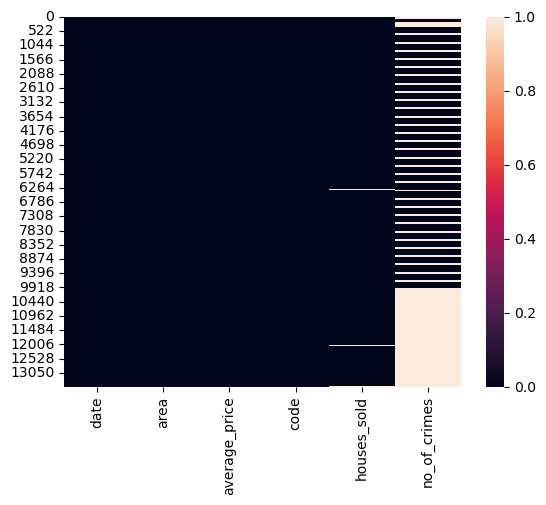

In [98]:
sns.heatmap(df.isnull())
plt.show()

In [101]:
#  We can replace all NAN values for col "no_of_crimes", and "houses_sold" with zeros as it incicates no crimes committed for any numerical calc
df[['no_of_crimes', 'houses_sold']] = df[['no_of_crimes', 'houses_sold']].fillna(0)

# Check

df.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
dtype: int64

## 2- We will check if the data types are correct or need any modification

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13549 non-null  float64
 5   no_of_crimes   13549 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


### While checking, the below needs to be modified:-
- Date converted from object to Date type
- Average price from int to float
- houses_sold from float to int
- no_of_crimes from float to int

In [103]:
df[['houses_sold','no_of_crimes']] = df[['houses_sold','no_of_crimes']].astype('int64')
df['average_price'] = df['average_price'].astype('float')
#df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('datetime64[ns]')

In [104]:
df['year'] = df.date.dt.year

In [112]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,month,year
0,1995-01-01,city of london,91449.0,E09000001,17,0,1,1995
1,1995-02-01,city of london,82203.0,E09000001,7,0,2,1995
2,1995-03-01,city of london,79121.0,E09000001,14,0,3,1995
3,1995-04-01,city of london,77101.0,E09000001,7,0,4,1995
4,1995-05-01,city of london,84409.0,E09000001,10,0,5,1995


In [111]:
df.insert(6,'month',df.date.dt.month)

## EDA for our Dataset to get insights

### a. Checking areas with the highest average prices and lowest average prices

In [52]:
df.groupby('area').average_price.median().sort_values(ascending = False)

# Get the highest 5 & Lowest 5 Areas
Areas_Price = pd.DataFrame(df.groupby('area').average_price.median().sort_values(ascending = False)).reset_index()
print("Top five areas with the highest average prices \n",Areas_Price.head())
print("Lowest five areas with the highest average prices \n",Areas_Price.tail())


Top five areas with the highest average prices 
                      area  average_price
0  kensington and chelsea       695308.0
1             westminster       502387.0
2                  camden       446413.0
3  hammersmith and fulham       422518.0
4          city of london       382571.0
Lowest five areas with the highest average prices 
                     area  average_price
40         west midlands       145807.0
41         east midlands       138440.0
42  yorks and the humber       129642.0
43            north west       128951.0
44            north east       117028.0


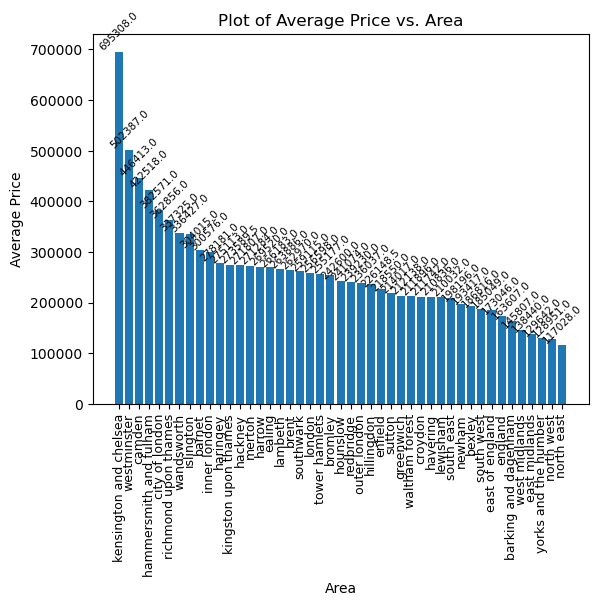

In [76]:
plt.bar(Areas_Price['area'], Areas_Price['average_price'])
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.title('Plot of Average Price vs. Area')
plt.xticks(rotation=90, fontsize=9)  # Rotate x-axis labels for better visibility
#plt.xticks(range(len(area_names)), area_names)  # Set custom ticks with area names

# Annotate each bar with its value
for i, value in enumerate(Areas_Price['average_price']):
    plt.text(i, value, str(value), ha='center', va='bottom', rotation=45,fontsize=7.5)

plt.show()

### b. Checking areas with the highest crimes and lowest crimes

In [75]:
# Get the highest 5 & Lowest 5 Areas
Areas_Crime_Rate = pd.DataFrame(df.groupby('area').no_of_crimes.sum().sort_values(ascending = False)).reset_index()
print("Top five areas with the highest crime number \n",Areas_Crime_Rate.head())
print("Lowest five areas with the lowest crime number \n",Areas_Crime_Rate.tail())


Top five areas with the highest crime number 
           area  no_of_crimes
0  westminster       1211743
1      lambeth        719454
2       camden        699955
3    southwark        693541
4       newham        652978
Lowest five areas with the highest crime number 
                     area  no_of_crimes
40          outer london             0
41            north west             0
42            north east             0
43                london             0
44  yorks and the humber             0


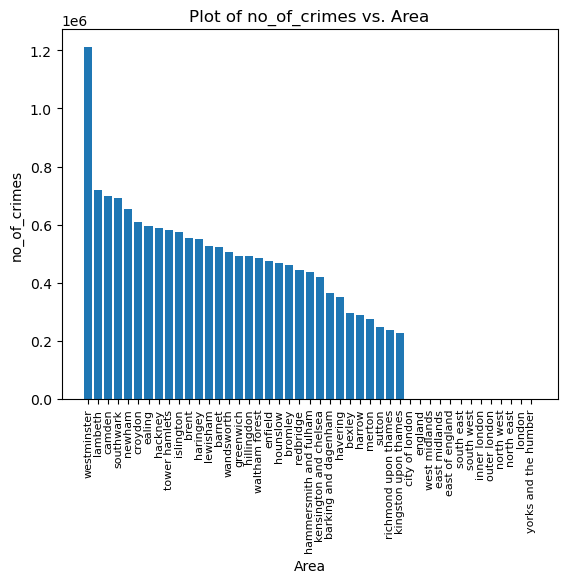

In [79]:
plt.bar(Areas_Crime_Rate['area'], Areas_Crime_Rate['no_of_crimes'])
plt.xlabel('Area')
plt.ylabel('no_of_crimes')
plt.title('Plot of no_of_crimes vs. Area')
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for better visibility
#plt.xticks(range(len(area_names)), area_names)  # Set custom ticks with area names


plt.show()

### c. Checking areas with the highest sold houses for last 3 yesrs

In [84]:
df_filtered = df[df['date'] >= '2018-01-01']

In [85]:
House_sold_rate = pd.DataFrame(df_filtered.groupby('area').houses_sold.sum().sort_values(ascending = False)).reset_index()
print("Top five areas with the highest number of sold houses \n",House_sold_rate.head())
print("Lowest five areas with lowest number of sold houses \n",House_sold_rate.tail())

Top five areas with the highest number of sold houses 
               area  houses_sold
0          england      1558959
1       south east       266722
2       north west       215743
3       south west       184033
4  east of england       183850
Lowest five areas with lowest number of sold houses 
                       area  houses_sold
40    barking and dagenham         3372
41               islington         3342
42                  camden         3230
43  kensington and chelsea         2551
44          city of london          519


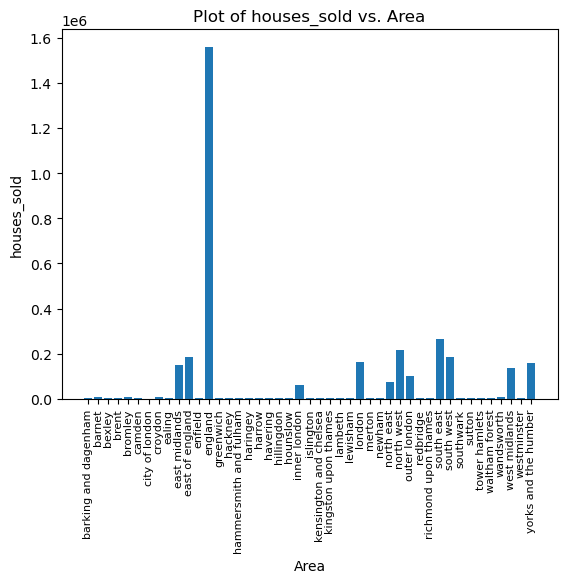

In [88]:
filtered = pd.DataFrame(df_filtered.groupby('area').houses_sold.sum()).reset_index()

plt.bar(filtered['area'], filtered['houses_sold'])
plt.xlabel('Area')
plt.ylabel('houses_sold')
plt.title('Plot of houses_sold vs. Area')
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for better visibility
#plt.xticks(range(len(area_names)), area_names)  # Set custom ticks with area names


plt.show()

In [109]:
df.to_csv(r'D:\Other\1-IBM Data Analysis\(10) Data Analyst Portfolio Projects\4- Data Analysis Projects\Python Projects - Data Analytics\file.csv', index=False)